# Importing the packages

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)
%matplotlib inline

# Loading the dataset

This is the Santander Product Recommendation dataset from [Kaggle](https://www.kaggle.com/c/santander-product-recommendation/data).

In [78]:
train_path = 'data/train_ver2.csv'

df = pd.read_csv(train_path, nrows=10000, parse_dates=['fecha_dato', 'fecha_alta', 'ult_fec_cli_1t'],
                 sep=",",na_values = ['?', 'NA'], engine='python')

df.head(5)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaT,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaT,1.0,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaT,1.0,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaT,1.0,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaT,1.0,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [79]:
test_path = 'data/test_ver2.csv'

test_df = pd.read_csv(test_path, nrows=10000, parse_dates=['fecha_dato', 'fecha_alta', 'ult_fec_cli_1t'],
                 sep=",",na_values = ['?', 'NA'], engine='python')

test_df.head(5)

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,NaT,1.0,A,S,N,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,NaT,1.0,I,S,N,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,NaT,1.0,A,S,N,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,NaT,1.0,I,S,N,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,NaT,1.0,I,S,N,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO


In [80]:
columns_num = ['age',
               'renta']

columns_cat = ['ind_empleado', 
               'ncodpers',  
               'indrel',
               'pais_residencia', 
               'sexo','ind_nuevo', 
               'tiprel_1mes', 
               'indresi',
               'indrel_1mes',
               'indext',
               'canal_entrada',
               'conyuemp', 
               'indfall',
               'nomprov',
               'segmento',
               'tipodom',
               'cod_prov',
               'ind_actividad_cliente']

columns_date =['fecha_dato',
               'fecha_alta',
               'ult_fec_cli_1t']

# Descriptive Statistics & Visualization

In [64]:
print("age value statistics", df['age'].describe())
print("\n \n renta value statistics \n \n", df['renta'].describe())

print("categorical value statistics \n\n",df[columns_cat].describe())
print("date value statistics \n \n",df[columns_date].describe())

age value statistics count     13647309
unique         121
top             23
freq        779884
Name: age, dtype: object

 
 renta value statistics 
 
 count    1.085293e+07
mean     1.342543e+05
std      2.306202e+05
min      1.202730e+03
25%      6.871098e+04
50%      1.018500e+05
75%      1.559560e+05
max      2.889440e+07
Name: renta, dtype: float64
categorical value statistics 

            ncodpers        indrel     ind_nuevo     tipodom      cod_prov  \
count  1.364731e+07  1.361958e+07  1.361958e+07  13619574.0  1.355372e+07   
mean   8.349042e+05  1.178399e+00  5.956184e-02         1.0  2.657147e+01   
std    4.315650e+05  4.177469e+00  2.366733e-01         0.0  1.278402e+01   
min    1.588900e+04  1.000000e+00  0.000000e+00         1.0  1.000000e+00   
25%    4.528130e+05  1.000000e+00  0.000000e+00         1.0  1.500000e+01   
50%    9.318930e+05  1.000000e+00  0.000000e+00         1.0  2.800000e+01   
75%    1.199286e+06  1.000000e+00  0.000000e+00         1.0  3.500000e+0

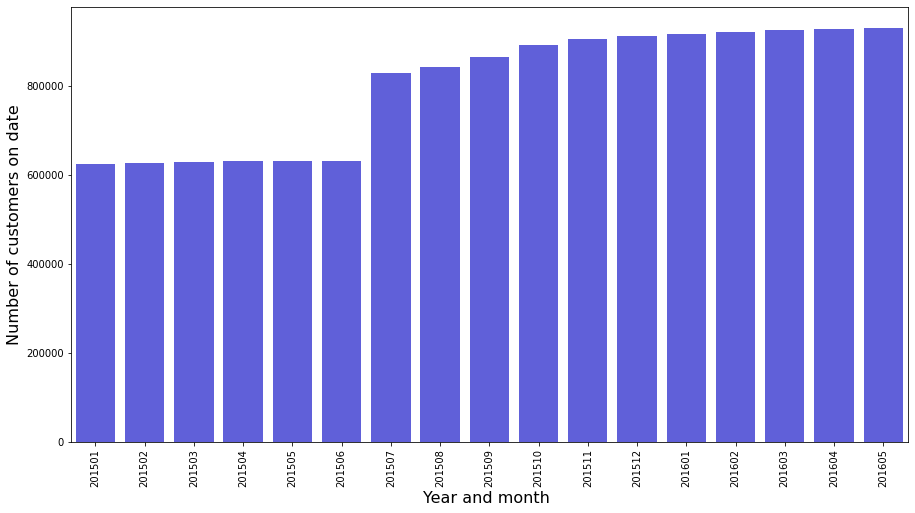

In [61]:
yearmonth = df['fecha_dato'].apply(
    lambda x: (100*x.year) + x.month
).value_counts()

# Size of figure
plt.figure(figsize=(15,8))

# Plot the values
sns.barplot(
    yearmonth.index, 
    yearmonth.values,
    alpha=0.7,
    color=(0, 0, 0.9)
)

# Make labels x: yyyymm format
plt.xlabel('Year and month ', fontsize=16)
plt.ylabel('Number of customers on date', fontsize=16)

# Make xlabel vertical instead of horizontal
plt.xticks(rotation='vertical')

plt.show()

# Cleaning the dataset

In [26]:
import numpy as np

print("Training NaN values percentages \n\n",(df.isna().sum()/df.shape[0])*100)
print("\n\n Testing NaN values percentages \n\n",(test_df.isna().sum()/test_df.shape[0])*100)

Training NaN values percentages 

 fecha_dato                 0.00
ncodpers                   0.00
ind_empleado               0.50
pais_residencia            0.50
sexo                       0.50
age                        0.00
fecha_alta                 0.50
ind_nuevo                  0.50
antiguedad                 0.00
indrel                     0.50
ult_fec_cli_1t            99.88
indrel_1mes                0.50
tiprel_1mes                0.50
indresi                    0.50
indext                     0.50
conyuemp                 100.00
canal_entrada              0.50
indfall                    0.50
tipodom                    0.50
cod_prov                   0.54
nomprov                    0.54
ind_actividad_cliente      0.50
renta                     18.99
segmento                   0.50
ind_ahor_fin_ult1          0.00
ind_aval_fin_ult1          0.00
ind_cco_fin_ult1           0.00
ind_cder_fin_ult1          0.00
ind_cno_fin_ult1           0.00
ind_ctju_fin_ult1          0.00
ind_c

## Removing the obvious features

We can clearly see that 'ult_fec_cli_1t' and 'conyuemp' should be removed, because they have almost 100% NaN values, which we cannot use for anything.

In [81]:
# remove columns with too many NaN values
df = df.drop(['ult_fec_cli_1t', 'conyuemp'], axis=1)
test_df = test_df.drop(['ult_fec_cli_1t', 'conyuemp'], axis=1)

columns_cat.remove('conyuemp')
columns_date.remove('ult_fec_cli_1t')

## The feature 'renta'

This feature has nan values, but not enough to where we want to drop it. Instead, we choose to prepare it for imputation.

In [124]:
# make nan values into numpy nan values
df['renta'] = df['renta'].fillna(np.nan)

# test data is type object
new_vals = []
for val in test_df['renta']:
    check = str(val).replace(' ', '').lower()
    
    if check == '?' or check == 'na' or check == 'nan':
        val = np.nan
    
    new_vals.append(val)
    
test_df['renta'] = np.array(new_vals, dtype=float)

## Imputation

We have chosen to impute the values for renta, since the feature could potentially have good predictive power, in terms of which products a customer might want to purchase.

In [125]:
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
df['renta'] = imputer.fit_transform(df['renta'].values.reshape(-1, 1))
print(df['renta'].isna().sum())

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
test_df['renta'] = imputer.fit_transform(test_df['renta'].values.reshape(-1, 1))
print(test_df['renta'].isna().sum())

0
0


## The rest of the data

We choose to drop the rest of the rows that contains NaN values, since we can see that it is such a small percentage that it won't matter.

In [126]:
# drop rest of rows with NaN values, since there are few
df = df.dropna()
test_df = test_df.dropna()

### A quick check on the total number of NaN values

In [128]:
train_nan_values = 0
test_nan_values = 0

for name, values in df.iteritems():
    for val in values:
        check = str(val).replace(' ', '').lower()
        if check == '?' or check == 'na' or check == 'nan':
            train_nan_values += 1

for name, values in test_df.iteritems():
    for val in values:
        check = str(val).replace(' ', '').lower()
        if check == '?' or check == 'na' or check == 'nan':
            test_nan_values += 1
            
print(f'There are {train_nan_values} NaN values in training dataset')
print(f'There are {test_nan_values} NaN values in testing dataset')

There are 0 NaN values in training dataset
There are 0 NaN values in testing dataset


# Preparing X and Y values

In this section, we want to prepare our inputs and outputs of the model. In particular, we want to include the prior information of which products the customer is already paying for.